## UNDERSTANDING GRADIENT DESCENT WITH RESPECT TO B AND TAKING M AS VALUE THAT IS ALREADY KNOWN TO USER

In [9]:
from sklearn.datasets import make_regression
import numpy as np

In [10]:
x,y = make_regression(n_samples=4,n_features=1,n_informative=1,noise=80,random_state=13)

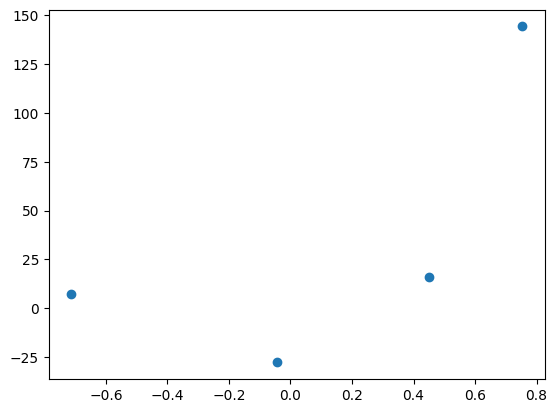

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
reg.coef_ # value of m

array([78.35063668])

In [14]:
reg.intercept_ # value of c

np.float64(26.15963284313262)

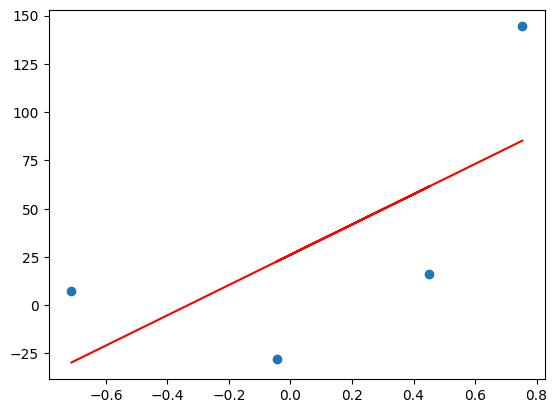

In [15]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

In [16]:
#Lets apply gradient descent assuming slope is constant m =78.35
# and lets assume the starting value of intercept b = 0
y_pred = ((78.36 * x) + 0).reshape(4)

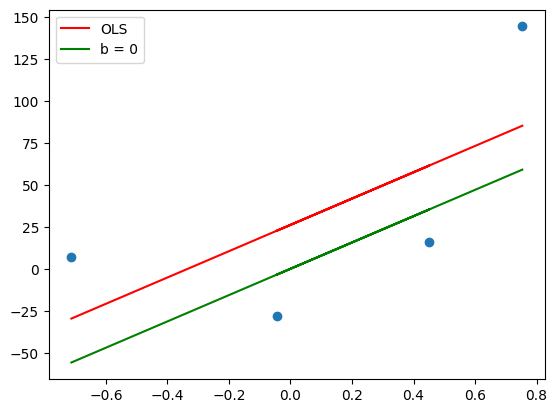

In [17]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred,color='green',label ='b = 0')
plt.legend()
plt.show()

In [18]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
loss_slope

np.float64(-209.27763408209216)

In [19]:
#Lets take learning rate as 0.1 
lr =0.1
step_size = loss_slope * lr
step_size

np.float64(-20.927763408209216)

In [20]:
#calculating new  intercept
b = b - step_size
b

np.float64(20.927763408209216)

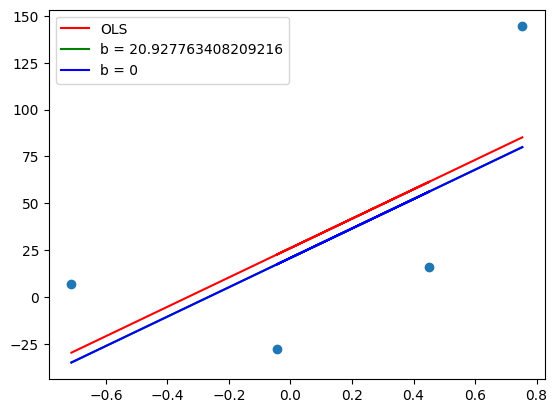

In [21]:
y_pred = ((78.36 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred,color='green',label ='b = {}'.format(b))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

In [22]:
b

np.float64(20.927763408209216)

In [23]:
#Iteration 2 where b - -20.92...

loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
loss_slope

np.float64(-376.6997413477659)

In [24]:
step_size = loss_slope * lr
step_size

np.float64(-37.66997413477659)

In [25]:
b = b - step_size
b

np.float64(58.597737542985804)

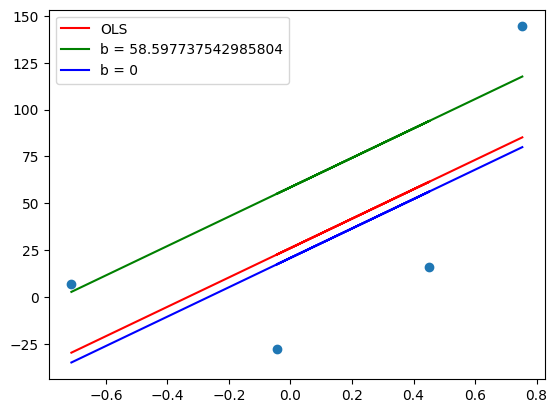

In [26]:
y_pred1 = ((78.36 * x) + b).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred1,color='green',label ='b = {}'.format(b))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

In [27]:
b

np.float64(58.597737542985804)

In [28]:
#iteration 3 
loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
loss_slope

np.float64(-678.0595344259787)

In [29]:
step_size = loss_slope * lr
step_size

np.float64(-67.80595344259787)

In [30]:
b = b - step_size
b

np.float64(126.40369098558367)

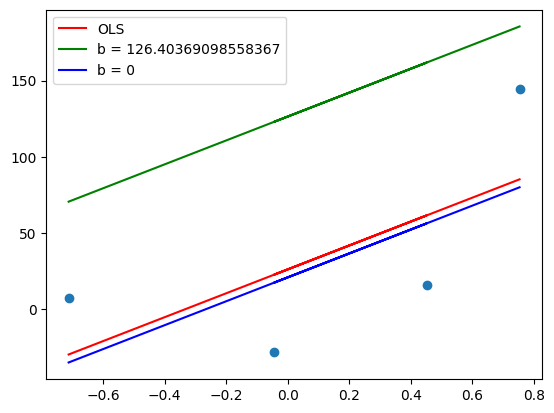

In [31]:
y_pred2 = ((78.36 * x) + b).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred2,color='green',label ='b = {}'.format(b))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

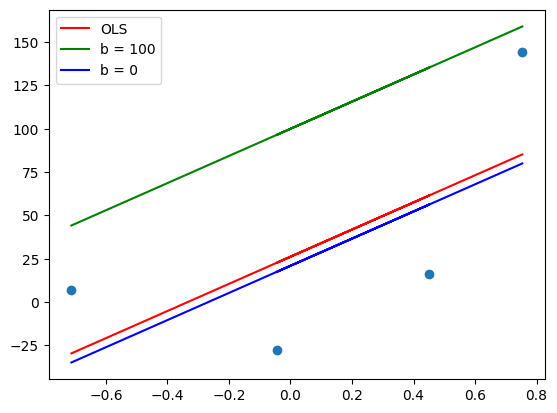

In [32]:
y_pred3 = ((78.36 * x) + 100).reshape(4) #now if we start with b = 100
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred3,color='green',label ='b = {}'.format(100))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

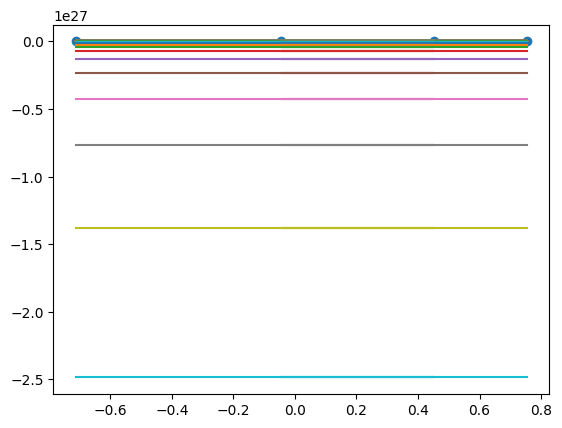

In [33]:
#lets proceed with b =100 and see how many iterations it takes to converge
b= -100
m = 78.35
lr =0.1
epochs =100
for i in range(epochs):
    loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
    step_size = loss_slope * lr
    b = b - step_size

    y_pred = ((78.36 * x) + b)

    plt.plot(x,y_pred)
plt.scatter(x,y)

## Creating our own CLASS

In [34]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


In [35]:
X,Y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=20,random_state=13)

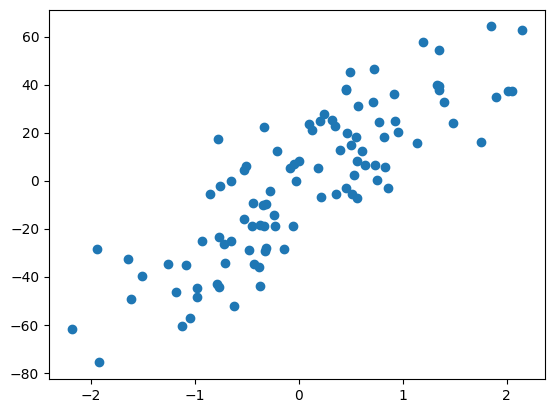

In [36]:
plt.scatter(X,Y)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [50]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.6345158782661012

In [48]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,Y):
        #calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum((Y - self.m*X.ravel() - self.b))
            loss_slope_m = -2 * np.sum((Y - self.m*X.ravel() - self.b) * X.ravel())

            self.b = self.b - (loss_slope_b * self.lr)
            self.m = self.m - (loss_slope_m * self.lr)
        
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [49]:
gd =GDRegressor(0.001,50)

In [51]:
gd.fit(X_train,Y_train)

28.159367347119066 -2.3004574196824854


In [52]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.6345158782661012

In [43]:
gd.predict(X)

array([[-22.13004587],
       [-14.46803398],
       [-14.93031641],
       [ 24.22481941],
       [  4.3220791 ],
       [ 21.67440917],
       [ -9.07267152],
       [  2.84916767],
       [-22.36969544],
       [-14.266255  ],
       [ 53.79864004],
       [  8.75884689],
       [  3.48535872],
       [ -8.76923699],
       [-23.69550079],
       [ 10.31541979],
       [ 15.51330493],
       [  7.70913832],
       [-47.25904197],
       [ 46.39456556],
       [-24.26231913],
       [-16.55078722],
       [-28.14130775],
       [ 57.56115677],
       [ -8.07119002],
       [-47.92672634],
       [-11.72532075],
       [-11.26615965],
       [-15.69914914],
       [-16.86253782],
       [ 17.79820103],
       [ 19.02152826],
       [ 10.32439521],
       [-37.41858492],
       [-63.18204405],
       [-35.29775901],
       [  3.75403106],
       [ 34.73292872],
       [-32.56312362],
       [ 13.35252918],
       [-44.41234489],
       [ -2.36568738],
       [-10.04163129],
       [ 10